In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch as t
from gninvert.gns import MultiDiffusionGN
from gninvert.gnns import LinearGNN
from gninvert.hyperparamsearch import hpsearch
from gninvert.graph_compare import model_steps_compare
import matplotlib.pyplot as plt

In [3]:
diffusionGN = MultiDiffusionGN([0.1, 0.1])

In [4]:
device = t.device('cuda' if t.cuda.is_available() else 'cpu')

In [5]:
params = {
    'starting_lr': [0.1, 0.05, 0.01, 0.001],
    'lr_scheduler_dec_factor': [0.2],
    'lr_scheduler_patience': [20, 100],
    'lr_scheduler_cooldown': [20],
    'batch_size': [1, 10],
    'adam_weight_decay': [5e-7, 5e-6, 5e-5],
    'epochs': [300],
    'loss_func': [t.nn.MSELoss()]
}

In [16]:
params_simple = {
    'starting_lr': [0.001],
    'lr_scheduler_dec_factor': [0.2],
    'lr_scheduler_patience': [20],
    'lr_scheduler_cooldown': [20],
    'batch_size': [10],
    'adam_weight_decay': [5e-5],
    'epochs': [300],
    'loss_func': [t.nn.MSELoss()]
}

In [23]:
results = hpsearch(
    params,
    model_constructor = lambda : LinearGNN(2).to(device),
    model_score_fn = lambda model : model_steps_compare(model, diffusionGN)['absolute']['avg_difs'][-1]
)

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

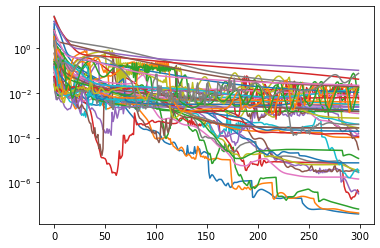

In [24]:
plots = [res['val_loss_history'] for res in results]
for p in plots:
    plt.plot(p)
plt.yscale('log')

In [25]:
[(results[i]['settings'],) for i in range(3)]

[({'starting_lr': 0.01,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 20,
   'lr_scheduler_cooldown': 20,
   'batch_size': 1,
   'adam_weight_decay': 5e-07,
   'epochs': 300,
   'loss_func': MSELoss()},),
 ({'starting_lr': 0.05,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 20,
   'lr_scheduler_cooldown': 20,
   'batch_size': 1,
   'adam_weight_decay': 5e-07,
   'epochs': 300,
   'loss_func': MSELoss()},),
 ({'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 20,
   'lr_scheduler_cooldown': 20,
   'batch_size': 1,
   'adam_weight_decay': 5e-07,
   'epochs': 300,
   'loss_func': MSELoss()},)]

Best are 0th and 2nd one above

In [27]:
[(results[i]['score'], results[i]['val_loss_history'][-1]) for i in range(len(results))]

[(0.0009941927855834365, 3.874143672533137e-08),
 (0.0010250404011458158, 4.2558536250680845e-08),
 (0.0012728460133075714, 6.393215556954601e-08),
 (0.0017037742072716355, 3.770651630929933e-07),
 (0.0023620263673365116, 3.06473509681382e-07),
 (0.004351378884166479, 3.445065203777631e-06),
 (0.004550764802843332, 1.4032481203685165e-06),
 (0.006975661963224411, 2.8231793294253293e-06),
 (0.0077355667017400265, 3.3028175039362395e-06),
 (0.009398570284247398, 2.7638488973025233e-06),
 (0.010967586189508438, 7.416993412334705e-06),
 (0.012371824122965336, 0.00010129853035323322),
 (0.012592194601893425, 1.1686150173773058e-05),
 (0.0170334130525589, 0.00011052740592276677),
 (0.035003501921892166, 0.00015385419828817248),
 (0.039918117225170135, 2.9191911380621605e-05),
 (0.044033654034137726, 0.00012754624185618013),
 (0.04650503024458885, 0.00018827214080374688),
 (0.049025509506464005, 0.00027141268947161734),
 (0.0527484305202961, 0.00039123426540754735),
 (0.05427516624331474, 0.0

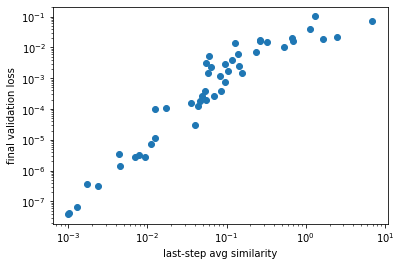

In [28]:
plt.scatter([result['score'] for result in results],
            [result['val_loss_history'][-1] for result in results])

plt.xlabel('last-step avg. absolute difference')
plt.ylabel('final validation loss')

plt.yscale('log')
plt.xscale('log')

In [11]:
plt.scatter([result['score'] for result in results],
            [result['val_loss_history'][-1] for result in results])

plt.xlabel('last-step avg. absolute difference')
plt.ylabel('final validation loss')

plt.yscale('log')
plt.xscale('log')

NameError: name 'results' is not defined

In [31]:
t.save(results[0]['model'], "models/sim2-hpmodel1.pt")

# Stability check

In [32]:
params_stability = {
    'starting_lr': [0.01, 0.01, 0.01, 0.01],
    'lr_scheduler_dec_factor': [0.2],
    'lr_scheduler_patience': [20],
    'lr_scheduler_cooldown': [20],
    'batch_size': [1],
    'adam_weight_decay': [5e-7],
    'epochs': [600],
    'loss_func': [t.nn.MSELoss()]
}

In [33]:
sresults = hpsearch(
    params_stability,
    lambda : LinearGNN(2).to(device),
    lambda model : model_steps_compare(model, diffusionGN)['absolute']['avg_difs'][-1]
)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

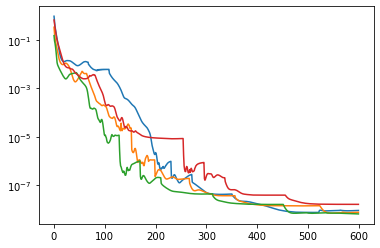

In [34]:
plots = [res['val_loss_history'] for res in sresults]
for p in plots:
    plt.plot(p)
plt.yscale('log')

In [38]:
t.save(sresults[0]['model'], 'models/sim2-hpmodel2.pt')

## Above: some idea of extent of randomness-induced instability in training with same hyperparams

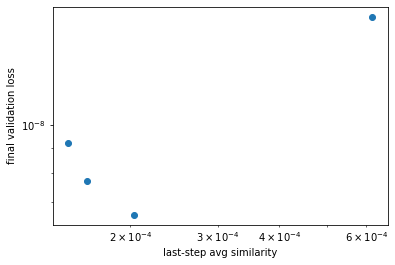

In [35]:
plt.scatter([result['score'] for result in sresults],
            [result['val_loss_history'][-1] for result in sresults])

plt.xlabel('last-step avg similarity')
plt.ylabel('final validation loss')

plt.yscale('log')
plt.xscale('log')